# 1 Análise exploratória de dados

# 1.1 Bibliotecas

In [14]:
import pandas as pd 
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

# 1.2 Importando arquivos

In [15]:
df_taxi = pd.read_csv('/datasets/project_sql_result_01.csv')  # Corridas de táxi
df_bairros = pd.read_csv('/datasets/project_sql_result_04.csv') # Bairros

print(df_taxi.head())
print(df_bairros.head())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [16]:
df_taxi.info()
df_bairros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


# 1.3 Identificando os 10 principais bairros

In [17]:
top_10_bairros = df_bairros.sort_values(by='average_trips', ascending=False).head(10)

print(top_10_bairros)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


# 1.4 Gráficos

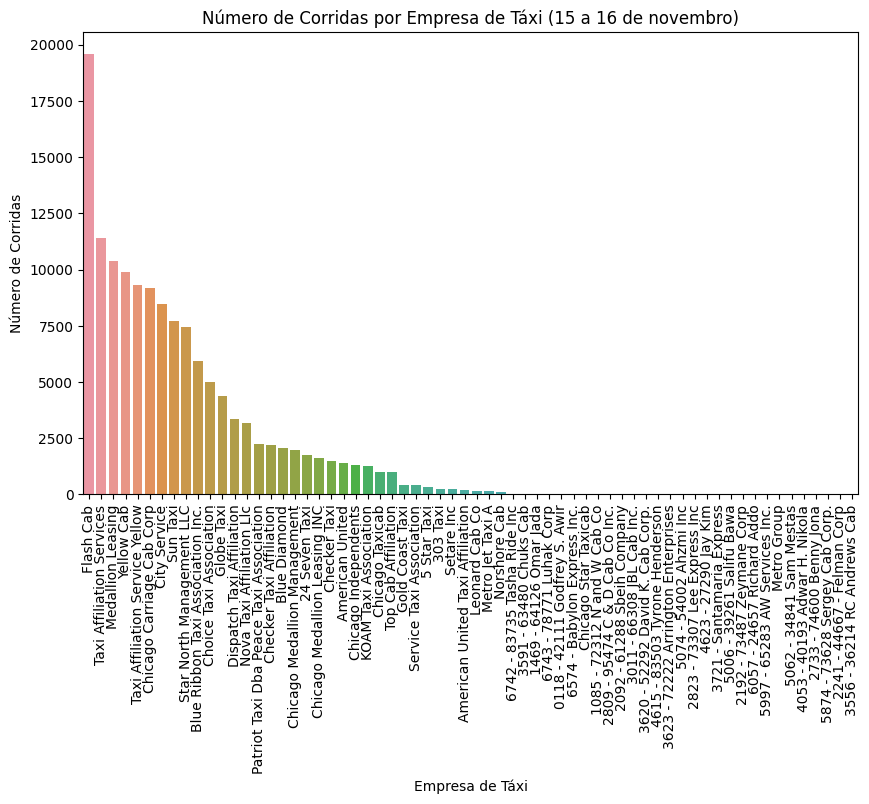

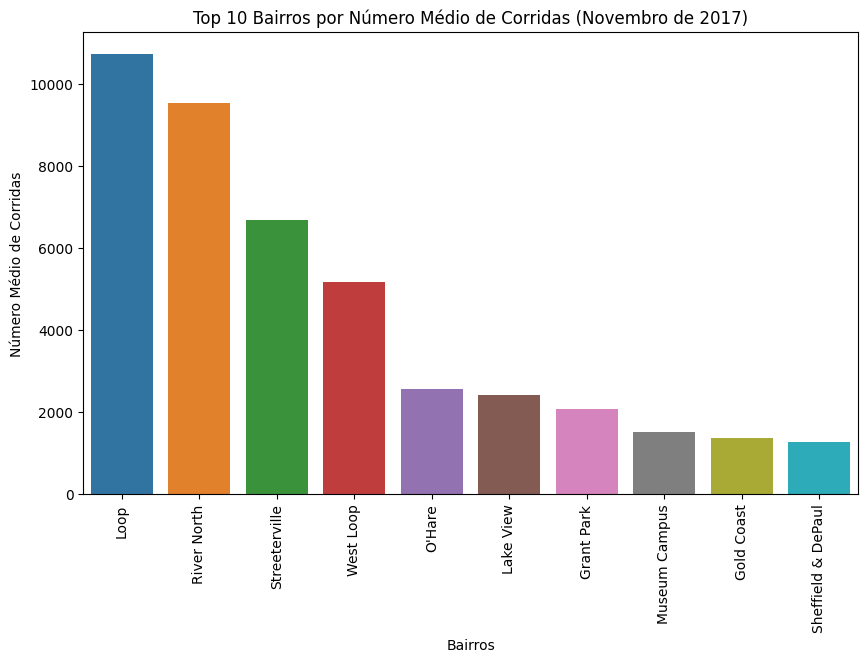

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='company_name', y='trips_amount', data=df_taxi)
plt.title('Número de Corridas por Empresa de Táxi (15 a 16 de novembro)')
plt.xticks(rotation=90)
plt.xlabel('Empresa de Táxi')
plt.ylabel('Número de Corridas')
plt.show()

# Gráfico de barras dos 10 principais bairros por número médio de corridas
plt.figure(figsize=(10, 6))
sns.barplot(x='dropoff_location_name', y='average_trips', data=top_10_bairros)
plt.title('Top 10 Bairros por Número Médio de Corridas (Novembro de 2017)')
plt.xticks(rotation=90)
plt.xlabel('Bairros')
plt.ylabel('Número Médio de Corridas')
plt.show()

# 1.5 Teste de hipóteses

In [20]:
df = pd.read_csv('/datasets/project_sql_result_07.csv')

rainy_rides = df[df['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_rides = df[df['weather_conditions'] == 'Good']['duration_seconds']

print(rainy_rides.var(), non_rainy_rides.var())

t_stat, p_value = stats.ttest_ind(rainy_rides, non_rainy_rides, equal_var=False)

print('Estatística t:', t_stat)
print('Valor-p:', p_value)

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: A duração média das corridas é diferente em sábados chuvosos.")
else:
    print("Não rejeitamos a hipótese nula: Não há evidência suficiente para dizer que a duração média das corridas é diferente em sábados chuvosos.")

Estatística t: 7.186034288068629
Valor-p: 6.738994326108734e-12
Rejeitamos a hipótese nula: A duração média das corridas é diferente em sábados chuvosos.


# Conclusão